In [ ]:
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt

# Questão 11.3
Use the RBF network to approximate the following functions:
- (a) $h(x) = (1 - x + 2x^2)e^{({-x^2}/2)}, x \in [-10,10].$
- (b) $f(x) = 2sin(x_1/4)cos(x_2/2), x \in [0,10].  $

**RESOLUÇÃO:**

# (a) $h(x) = (1 - x + 2x^2)e^{({-x^2}/2)}, x \in [-10,10].$

#Conjunto de dados de entrada e a função a)
A função linspace do numpy retorna números com espaçamento uniforme em um intervalo específico, neste caso o conjunto de dados que está alocado na variável x, será 2000 amostras entre - 10 e 10.
A função func_h é a implementação da função solicitada na letra a).

In [ ]:
x = np.linspace(-10,10,num=2000)

def func_h(x):
  return (1 - x + 2*(x) ** 2 ) * np.exp( (-(x) ** 2)/2 )

##Letra A
A variável h será um array com 2000 posições, cada posição é um retorno da função a) passando-se como entrada cada elemento de X.




In [ ]:
h = np.array([ func_h(x_) for x_ in x])

Neste trecho, o gráfico gerado pela função a) está sendo plotado.

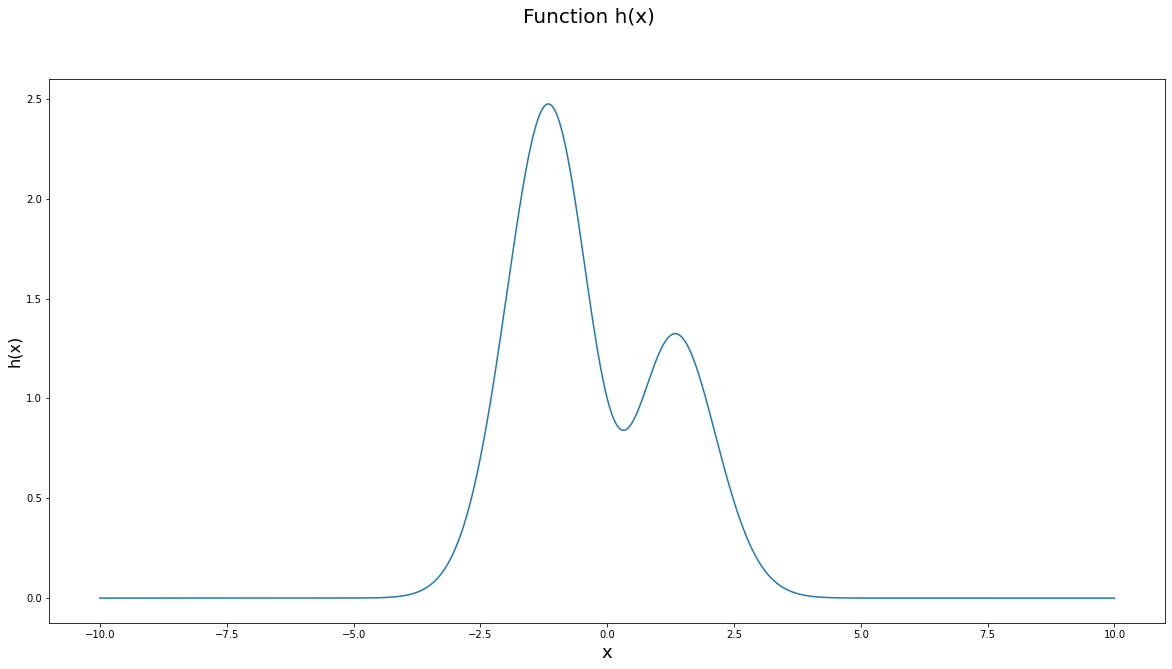

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))

plt.plot(x,h)

fig.suptitle('Function h(x)', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('h(x)', fontsize=16)
plt.show()

##Treinar a Rede Neural

Usamos o Kmeans para definir os centróides/clusters. Os centróides iniciais são inicializados aleatoriamente. Em seguida, apresentamos um algoritmo para definir os centróides. Da forma que foi implementado o nosso Kmeans retorna uma tupla com o centroide e o desvio padrão de cada cluster.


In [ ]:
#Função que nos da as distâncias. Para um vetor (dim=1), temos uma distância euclidiana tradicional.
#Se o input tiver dimensão 2 (matriz), aí utilizamos a função linalg.norm do numpy
def distance_function(dim, x, c):
  if(dim==1):
    return np.sqrt((x-c)*(x-c))
  if(dim==2):
    return np.linalg.norm(x-c)


def Kmeans(dim, X, k, maxiter):
  #Os centroides iniciais são inicializados aleatoriamente
   if dim == 1:
     centroids = X[np.random.choice(range(len(X)), k, replace=False)]
   else:
     centroids = X[np.random.choice(range(X.shape[0]), k, replace=False)]
   i = 0
   #Adicionar critério de convergência
   while (i<maxiter):
     clusters = [ [] for i in range(k)]
     
     for x in X:
       min_dist = 100000
       chosen_cluster = 0
       index_cluster = 0
       #print(x)
       for c in centroids:
         dist = distance_function(dim, x,c)
         if(dist< min_dist):
           min_dist = dist
           chosen_cluster = index_cluster
         index_cluster +=1 
       #print(len(distances))
       #arg = np.argmin(distances)
       #print(arg)
       clusters[chosen_cluster].append(x)
     centroids_anteriores = centroids.copy()
     centroids =[]
     for j in range(k):
       centroids.append(np.mean(clusters[j], axis=0))
     i= i+1
   return list(map(lambda x, y:(x,y), centroids, [np.std(x) for x in clusters])) #[centroids,  [np.std(x) for x in clusters] ]
#k = 5
#clusters_defined = Kmeans(1, x, k, maxiter = 100)
#clusters_defined = list(map(lambda x, y:(x,y), centroids, stds))
#centroids = clusters_defined[0]
#print(clusters_defined)


Fazendo o aprendizado

In [ ]:
def rbf_layer(x, clusters_defined, dim):
  rbf_activations = []
  for c in clusters_defined:
    #print(c)
    centroid = c[0]
    stds = c[1]

    beta = 1/ (stds ** 2)
    dist = distance_function(dim, x, centroid)
    activation = np.exp( -1 * beta * dist)
    rbf_activations.append(activation)
  #print(np.vectorize(rbf_activations))
  return rbf_activations
    

In [ ]:
from sklearn import cluster
def execute_experiment(learning_rate, D_in, D_out, K):
  training_loss = []
  test_loss = []
  epochs = 100
  w = np.random.randn(K, D_out)
  x_in = x.T
  clusters_defined = Kmeans(D_in, x, K, 100)
  
  from torch.autograd import grad
  for i in range(epochs):

    j = np.matrix([ rbf_layer(x_, clusters_defined, D_in) for x_ in x_in])
    #print(j.shape)
    #print(w.shape)
    j_pred = np.matmul(j, w)
    loss_ = np.power((j_pred - h), 2)
    loss = loss_.sum()
    training_loss.append(loss)
    #print("Loss do treino")
    print("Epoch {} -> loss {}".format(i,loss))

    ### Backpropagation
    grad_j_pred = 2.0 * (j_pred - h)
    grad_w = np.matmul(j.T, grad_j_pred)
    
    
    ### Reajustes dos parâmetros
    w -= learning_rate * grad_w

  return  training_loss, j_pred

In [ ]:
D_in, K, D_out = 1, 6, 1
learning_rate = 0.007

In [ ]:
h = h.reshape(2000,1)

In [ ]:
training_loss, h_pred = execute_experiment(learning_rate, D_in, D_out, K)

Epoch 0 -> loss 1868.64227374461
Epoch 1 -> loss 488.42964349744113
Epoch 2 -> loss 272.25530040122334
Epoch 3 -> loss 204.12890747603095
Epoch 4 -> loss 180.82363959213006
Epoch 5 -> loss 172.6299677582232
Epoch 6 -> loss 169.70973269422743
Epoch 7 -> loss 168.66090715746452
Epoch 8 -> loss 168.28244387038797
Epoch 9 -> loss 168.14547077759016
Epoch 10 -> loss 168.0958018595593
Epoch 11 -> loss 168.07776818071318
Epoch 12 -> loss 168.07121507432373
Epoch 13 -> loss 168.06883247767237
Epoch 14 -> loss 168.067965888787
Epoch 15 -> loss 168.06765061979434
Epoch 16 -> loss 168.06753590501845
Epoch 17 -> loss 168.0674941600801
Epoch 18 -> loss 168.06747896793814
Epoch 19 -> loss 168.06747343883677
Epoch 20 -> loss 168.06747142648652
Epoch 21 -> loss 168.0674706940642
Epoch 22 -> loss 168.06747042748555
Epoch 23 -> loss 168.06747033045843
Epoch 24 -> loss 168.06747029514307
Epoch 25 -> loss 168.06747028228912
Epoch 26 -> loss 168.0674702776106
Epoch 27 -> loss 168.06747027590777
Epoch 28 ->

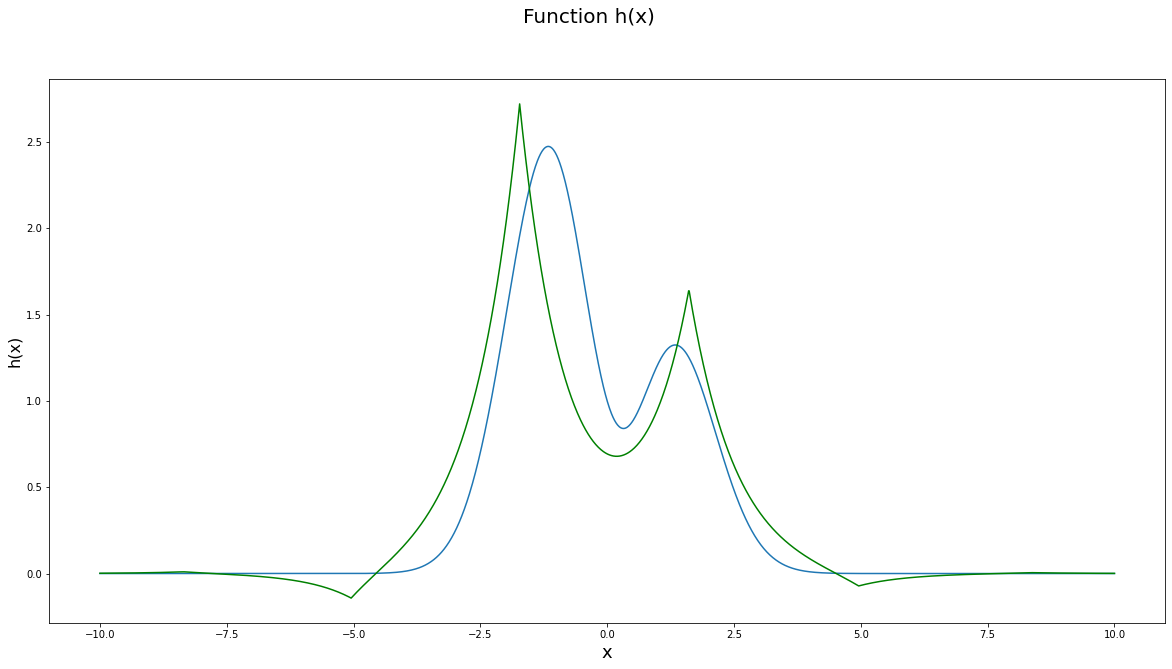

In [ ]:
fig = plt.figure(figsize=(20, 10))


plt.plot(x,h)
plt.plot(x,h_pred, color='green')
fig.suptitle('Function h(x)', fontsize=20)
plt.xlabel('x', fontsize=18)
plt.ylabel('h(x)', fontsize=16)

#plt.ylim(50,15000)
plt.show()

## Comentário sobre a letra a)

A função aproximada foi gerada utilizando os melhores valores de hiperparâmetros encontrados, incluindo a quantidade de kernels na camada RBF. Como a distribuição dos dados no intervalo do problema é amostrada de forma uniforme, os kernels encontrados na parte não supervisionada ficam igualmente distribuidos. Essa disposição dos kernels pode não ser a melhor para aproximar a função dada. Caso os kernels fossem localizados próximos aos picos da função desejada, a função aproximada poderia ser mais próxima da original.

# (b) $f(x) = 2sin(x_1/4)cos(x_2/2), x \in [0,10].  $

In [ ]:
samples = 20

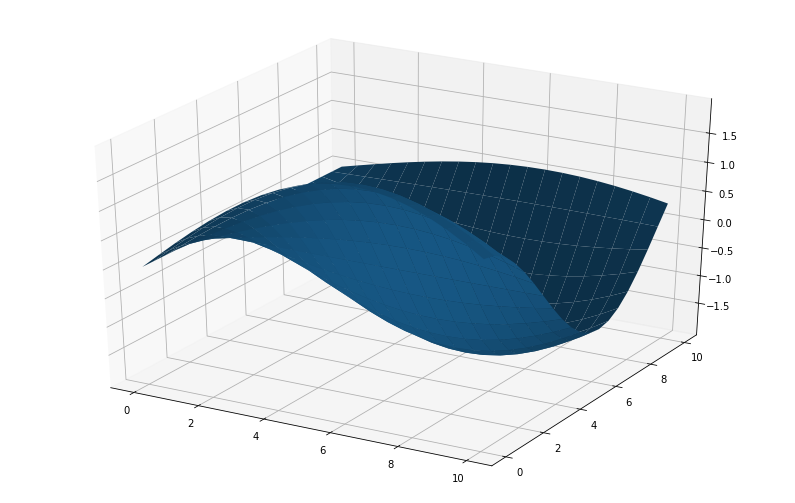

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x1 = np.outer(np.linspace(0, 10, samples), np.ones(samples))
x2 = x1.copy().T # transpose
f = 2 * np.sin(x1/4) * np.cos(x2/2)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x1, x2, f)
 
# show plot
plt.show()

Essa parte consiste na manipulação dos dados gerados para a função f, de forma que os pontos da função são transformados em um array com 3 variáveis: x1, x2 e f(x1,x2)

In [ ]:
x = np.linspace(0,10,num=samples)

In [ ]:
f_table = np.zeros((samples ** 2, 3))
k = 0
for i in range(0,samples):
  x1_i = x[i]
  for j in range(0,samples):
    x2_j = x[j]
    f_table[k] = np.array([x1_i, x2_j, f[i][j]])
    k = k+1
f_table

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.52631579,  0.        ],
       [ 0.        ,  1.05263158,  0.        ],
       ...,
       [10.        ,  8.94736842, -0.28301068],
       [10.        ,  9.47368421,  0.02926611],
       [10.        , 10.        ,  0.33952783]])

A função tem N^2 linhas, pois essa é a quantidade de pontos gerada para o plano, onde os intervalos dos eixos variam entre 0 e N-1.

In [ ]:
f_table.shape 

(400, 3)

Separando o conjunto de entrada (coordenadas x1, x2) e os valores da função f em variáveis distintas:

In [ ]:
x_in = f_table[:,0:2] # entrada

In [ ]:
f_out = f_table[:,2] # saída

Parâmetros da rede:


1.   D_in: dimensão do vetor de entrada (duas dimensões referentes à x1 e x2)
2.   K: quantidade de kernels RBF
3.   D_out: saída da rede (um nó apenas, que indica o valor predito para a função f)



In [ ]:
D_in, K, D_out = 2, 32, 1
learning_rate = 0.0005

In [ ]:
f_out = f_out.reshape(f_out.shape[0],1) # apenas para ajustar o vetor de saída para multiplicação de vetores. Esse ajuste é para evitar problemas com o numpy

In [ ]:
def execute_experiment_b(learning_rate, D_in, D_out, K):
  training_loss = []
  test_loss = []
  epochs = 1000
  w = np.random.randn(K, D_out)
  #x_in = x.T
  clusters_defined = Kmeans(D_in, x_in, K, 2)

  from torch.autograd import grad
  for i in range(epochs):
    #print(clusters_defined)
    j = np.matrix([ rbf_layer(x_, clusters_defined, D_in) for x_ in x_in])
    #print(j.shape)
    #print(w.shape)
    j_pred = np.matmul(j, w)
    loss_ = np.power((j_pred - f_out), 2)
    loss = loss_.sum()
    training_loss.append(loss)
    #print("Loss do treino")
    print("Epoch {} -> loss {}".format(i,loss))

    ### Backpropagation
    grad_j_pred = 2.0 * (j_pred - f_out)
    grad_w = np.matmul(j.T, grad_j_pred)
    
    ### Reajustes dos parâmetros
    w -= learning_rate * grad_w
  return  training_loss, j_pred

In [ ]:
training_loss, j_pred = execute_experiment_b(learning_rate, D_in, D_out, K)

Epoch 0 -> loss 4407.633405188675
Epoch 1 -> loss 4800.545720066003
Epoch 2 -> loss 5398.000139855116
Epoch 3 -> loss 6223.975028303377
Epoch 4 -> loss 7313.291945031144
Epoch 5 -> loss 8712.974716630175
Epoch 6 -> loss 10484.19132591486
Epoch 7 -> loss 12704.854549949801
Epoch 8 -> loss 15472.988721101232
Epoch 9 -> loss 18911.00565235057
Epoch 10 -> loss 23171.074357022873
Epoch 11 -> loss 28441.81863692942
Epoch 12 -> loss 34956.63617097706
Epoch 13 -> loss 43004.005098902635
Epoch 14 -> loss 52940.232506142675
Epoch 15 -> loss 65205.20762040092
Epoch 16 -> loss 80341.85574970214
Epoch 17 -> loss 99020.15293912348
Epoch 18 -> loss 122066.76326748687
Epoch 19 -> loss 150501.6095921817
Epoch 20 -> loss 185582.9954002591
Epoch 21 -> loss 228863.27381964383
Epoch 22 -> loss 282257.5265321557
Epoch 23 -> loss 348128.2909614382
Epoch 24 -> loss 429390.08415424405
Epoch 25 -> loss 529638.3476492529
Epoch 26 -> loss 653308.5180862774
Epoch 27 -> loss 805872.2611536942
Epoch 28 -> loss 99407

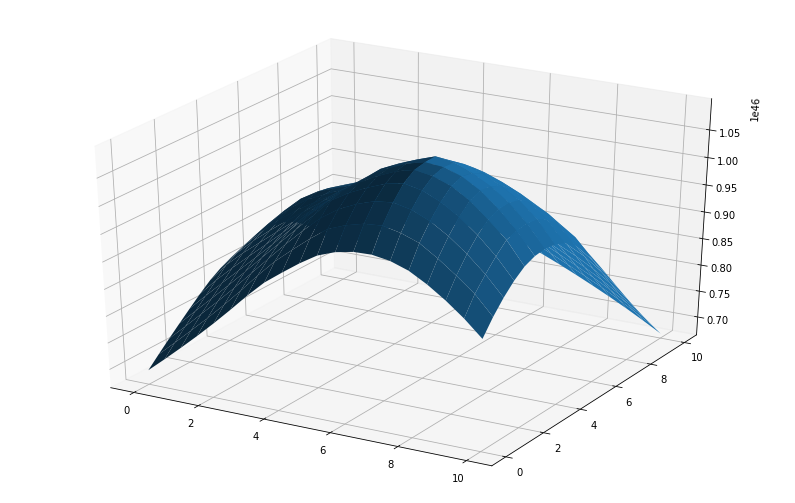

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x1 = np.outer(np.linspace(0, 10, samples), np.ones(samples))
x2 = x1.copy().T # transpose
f_predict = j_pred.reshape(samples, samples)
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x1, x2, f_predict)
 
# show plot
plt.show()

## Comentário letra B):

A aproximação da superfície feita pela rede RBF também utiliza os melhores valores de hiperparâmetros encontrados, assim como na questão A.

Como a distribuição dos dados no intervalo do problema é amostrada de forma uniforme, os kernels encontrados na parte não supervisionada ficam igualmente distribuidos. Essa disposição dos kernels pode não ser a melhor para aproximar a função dada. Caso os kernels fossem localizados próximos aos picos da função desejada, a função aproximada poderia ser mais próxima da original.